## Austin Reed

### CLIM711 Homework 6 - All coding and figures 

Scientific question: As diffusivity, and thus the damping coefficient is modified, how is the resulting vorticity field impacted? How is the propagation of the stream function modified through time? In which regions will these changes become more apparent?

Hypothesis: As the damping order is increased, the decay of the sinusoidal disturbance will become zonally symmetric much quicker in time, likely by day 5 or 10. As the damping option is increased, this decay will be modified much slower.

### Experimental Design

In [1]:
#import all necessary packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


### I. Modifying the damping order(exponent of Laplacian), while damping option is held constant at 1: 

a. Damping order of 2

In [2]:
f='/scratch/areed29/clim711/gfdl_spectral_code/experiments/t85barotropic/damp_order_2/barotropic.nc'
DS = xr.open_dataset(f,decode_times=False)
print(DS)

<xarray.Dataset>
Dimensions:   (lat: 128, latb: 129, lon: 256, lonb: 257, time: 25)
Coordinates:
  * lon       (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lonb      (lonb) float64 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat       (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * latb      (latb) float64 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
  * time      (time) float64 1.0 2.0 3.0 4.0 5.0 ... 21.0 22.0 23.0 24.0 25.0
Data variables:
    ucomp     (time, lat, lon) float32 ...
    vcomp     (time, lat, lon) float32 ...
    vor       (time, lat, lon) float32 ...
    pv        (time, lat, lon) float32 ...
    stream    (time, lat, lon) float32 ...
    trs       (time, lat, lon) float32 ...
    tr        (time, lat, lon) float32 ...
    eddy_vor  (time, lat, lon) float32 ...
    delta_u   (time, lat, lon) float32 ...
Attributes:
    filename:   barotropic.nc
    title:      t85barotropic
    grid_type:  regular
    grid_tile: 

In [3]:
#Extract necessary variables from the file
data_lat = DS.lat.values
data_lon = DS.lon.values
u_comp=DS.ucomp
v_comp=DS.vcomp
vor = DS.vor
pv= DS.pv.values
stream= DS.stream
trs = DS.trs
tr = DS.tr
eddy_vor = DS.eddy_vor
delta_u = DS.delta_u
#Select vorticity values for days 1, 5, 10, and 25
vorticity_days = vor.sel(time=(vor['time'][0],vor['time'][4],vor['time'][9],vor['time'][24]))
stream_days = stream.sel(time=(stream['time'][0],stream['time'][4],stream['time'][9],stream['time'][24]))

### Vorticity field

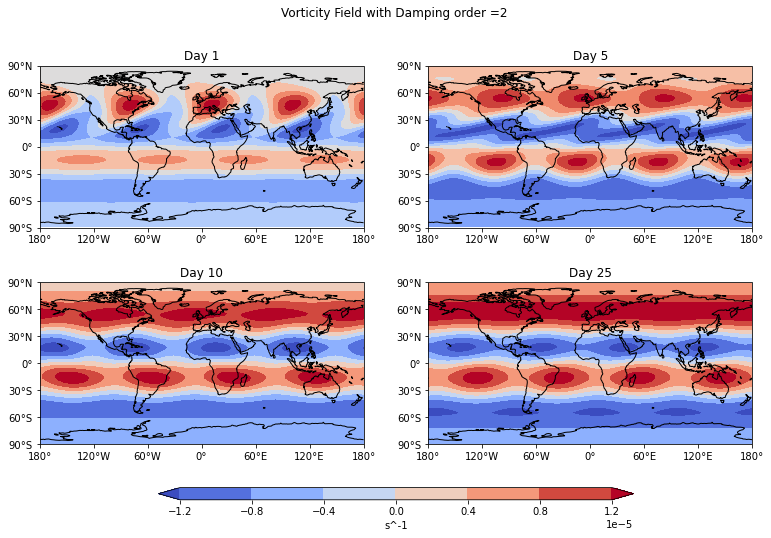

In [4]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the days and plot
for i,day in enumerate(vorticity_days):
        day_list = ['Day 1','Day 5','Day 10','Day 25']
        data= vorticity_days[i,:,:]
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=data_lon)

        # Contour plot
        cs=axs[i].contourf(lons,data_lat,data,transform = ccrs.PlateCarree(), cmap='coolwarm',extend='both')
       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(day_list[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='s^-1')

# Add a big title at the top
plt.suptitle('Vorticity Field with Damping order =2 ')
plt.savefig('/homes/areed29/CLIM711/HW6figs/vor_damporder2.png')

### Streamfunction field

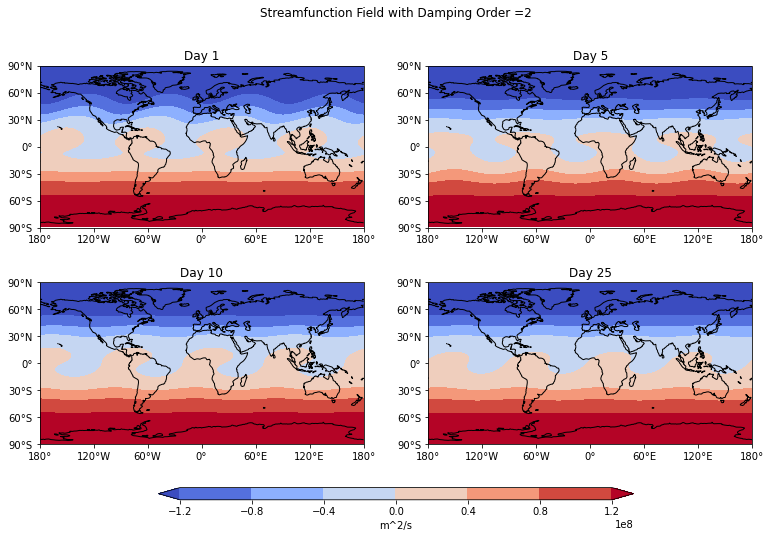

In [5]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the days and plot
for i,day in enumerate(stream_days):
        day_list = ['Day 1','Day 5','Day 10','Day 25']
        data= stream_days[i,:,:]
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=data_lon)

        # Contour plot
        cs=axs[i].contourf(lons,data_lat,data,transform = ccrs.PlateCarree(), cmap='coolwarm',extend='both')
       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(day_list[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m^2/s')

# Add a big title at the top
plt.suptitle('Streamfunction Field with Damping Order =2')
plt.savefig('/homes/areed29/CLIM711/HW6figs/stream_damporder2.png')

b. Damping order of 4 (default option)

In [6]:

print('\u2207')


∇


In [7]:
# Load in the file and its contents
f= '/scratch/areed29/clim711/gfdl_spectral_code/experiments/t85barotropic/damp_order_4/barotropic.nc'
DS= xr.open_dataset(f,decode_times=False)
print(DS)

<xarray.Dataset>
Dimensions:   (lat: 128, latb: 129, lon: 256, lonb: 257, time: 25)
Coordinates:
  * lon       (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lonb      (lonb) float64 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat       (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * latb      (latb) float64 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
  * time      (time) float64 1.0 2.0 3.0 4.0 5.0 ... 21.0 22.0 23.0 24.0 25.0
Data variables:
    ucomp     (time, lat, lon) float32 ...
    vcomp     (time, lat, lon) float32 ...
    vor       (time, lat, lon) float32 ...
    pv        (time, lat, lon) float32 ...
    stream    (time, lat, lon) float32 ...
    trs       (time, lat, lon) float32 ...
    tr        (time, lat, lon) float32 ...
    eddy_vor  (time, lat, lon) float32 ...
    delta_u   (time, lat, lon) float32 ...
Attributes:
    filename:   barotropic.nc
    title:      t85barotropic
    grid_type:  regular
    grid_tile: 

In [8]:
#Extract necessary variables from the file
data_lat = DS.lat.values
data_lon = DS.lon.values
u_comp=DS.ucomp
v_comp=DS.vcomp
vor = DS.vor
pv= DS.pv.values
stream= DS.stream
trs = DS.trs
tr = DS.tr
eddy_vor = DS.eddy_vor
delta_u = DS.delta_u
#Select vorticity values for days 1, 5, 10, and 25
vorticity_days = vor.sel(time=(vor['time'][0],vor['time'][4],vor['time'][9],vor['time'][24]))
stream_days = stream.sel(time=(stream['time'][0],stream['time'][4],stream['time'][9],stream['time'][24]))

### Vorticity field

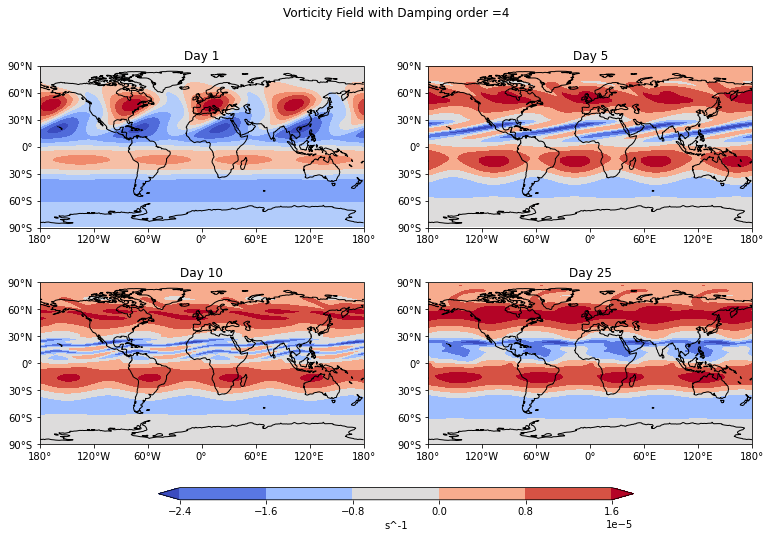

In [9]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the days and plot
for i,day in enumerate(vorticity_days):
        day_list = ['Day 1','Day 5','Day 10','Day 25']
        data= vorticity_days[i,:,:]
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=data_lon)

        # Contour plot
        cs=axs[i].contourf(lons,data_lat,data,transform = ccrs.PlateCarree(), cmap='coolwarm',extend='both')
       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(day_list[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='s^-1')

# Add a big title at the top
plt.suptitle('Vorticity Field with Damping order =4')
plt.savefig('/homes/areed29/CLIM711/HW6figs/vor_damporder4.png')

### Streamfunction field

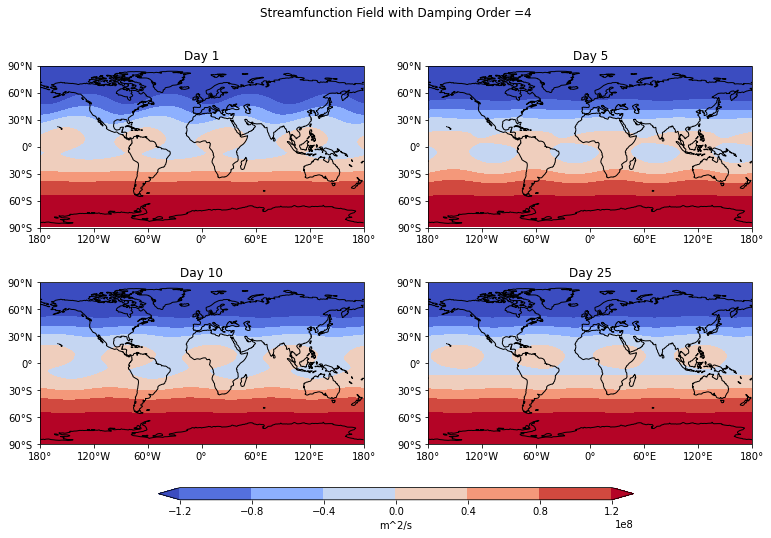

In [10]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the days and plot
for i,day in enumerate(stream_days):
        day_list = ['Day 1','Day 5','Day 10','Day 25']
        data= stream_days[i,:,:]
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=data_lon)

        # Contour plot
        cs=axs[i].contourf(lons,data_lat,data,transform = ccrs.PlateCarree(), cmap='coolwarm',extend='both')
       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(day_list[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m^2/s')

# Add a big title at the top
plt.suptitle('Streamfunction Field with Damping Order =4')
plt.savefig('/homes/areed29/CLIM711/HW6figs/stream_damporder4.png')

c. Damping order of 8

In [11]:
f='/scratch/areed29/clim711/gfdl_spectral_code/experiments/t85barotropic/damp_order_8/barotropic.nc'
DS = xr.open_dataset(f,decode_times=False)
print(DS)

<xarray.Dataset>
Dimensions:   (lat: 128, latb: 129, lon: 256, lonb: 257, time: 25)
Coordinates:
  * lon       (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lonb      (lonb) float64 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat       (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * latb      (latb) float64 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
  * time      (time) float64 1.0 2.0 3.0 4.0 5.0 ... 21.0 22.0 23.0 24.0 25.0
Data variables:
    ucomp     (time, lat, lon) float32 ...
    vcomp     (time, lat, lon) float32 ...
    vor       (time, lat, lon) float32 ...
    pv        (time, lat, lon) float32 ...
    stream    (time, lat, lon) float32 ...
    trs       (time, lat, lon) float32 ...
    tr        (time, lat, lon) float32 ...
    eddy_vor  (time, lat, lon) float32 ...
    delta_u   (time, lat, lon) float32 ...
Attributes:
    filename:   barotropic.nc
    title:      t85barotropic
    grid_type:  regular
    grid_tile: 

In [12]:
#Extract necessary variables from the file
data_lat = DS.lat.values
data_lon = DS.lon.values
u_comp=DS.ucomp
v_comp=DS.vcomp
vor = DS.vor
pv= DS.pv.values
stream= DS.stream
trs = DS.trs
tr = DS.tr
eddy_vor = DS.eddy_vor
delta_u = DS.delta_u
#Select vorticity values for days 1, 5, 10, and 25
vorticity_days = vor.sel(time=(vor['time'][0],vor['time'][4],vor['time'][9],vor['time'][24]))
stream_days = stream.sel(time=(stream['time'][0],stream['time'][4],stream['time'][9],stream['time'][24]))

### Vorticity Field

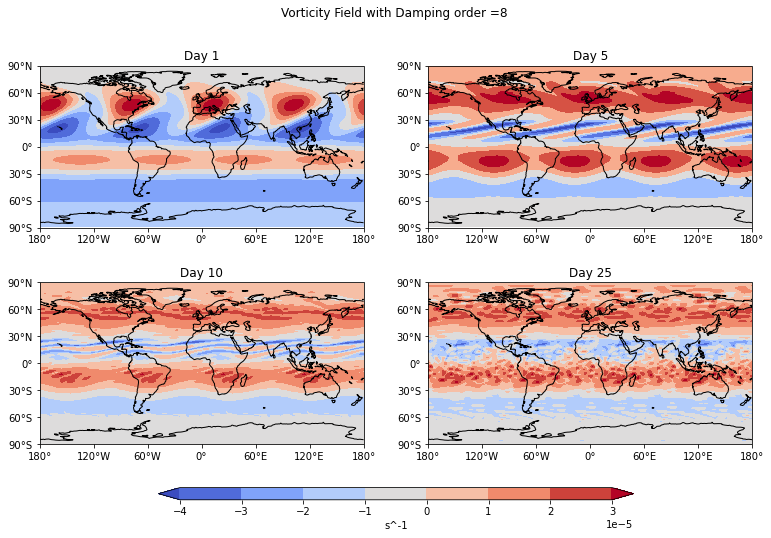

In [13]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the days and plot
for i,day in enumerate(vorticity_days):
        day_list = ['Day 1','Day 5','Day 10','Day 25']
        data= vorticity_days[i,:,:]
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=data_lon)

        # Contour plot
        cs=axs[i].contourf(lons,data_lat,data,transform = ccrs.PlateCarree(), cmap='coolwarm',extend='both')
       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(day_list[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='s^-1')

# Add a big title at the top
plt.suptitle('Vorticity Field with Damping order =8 ')
plt.savefig('/homes/areed29/CLIM711/HW6figs/vor_damporder8.png')

### Streamfunction Field

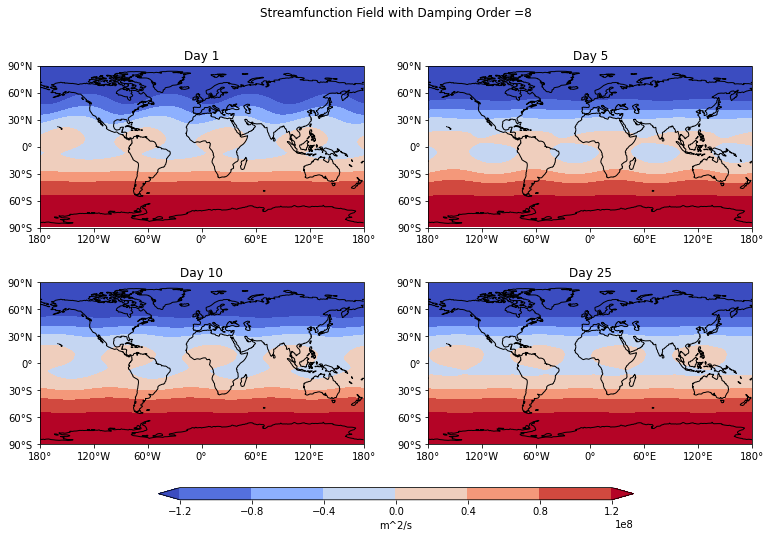

In [14]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the days and plot
for i,day in enumerate(stream_days):
        day_list = ['Day 1','Day 5','Day 10','Day 25']
        data= stream_days[i,:,:]
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=data_lon)

        # Contour plot
        cs=axs[i].contourf(lons,data_lat,data,transform = ccrs.PlateCarree(), cmap='coolwarm',extend='both')
       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(day_list[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m^2/s')

# Add a big title at the top
plt.suptitle('Streamfunction Field with Damping Order =8')
plt.savefig('/homes/areed29/CLIM711/HW6figs/stream_damporder8.png')

### II. Modifying the damping option (number in front of exponent), while damping order is held constant at 4

a. Damping option of 1 (default option)

In [26]:
# Load in the file and its contents
f= '/scratch/areed29/clim711/gfdl_spectral_code/experiments/t85barotropic/damp_option_1/barotropic.nc'
DS= xr.open_dataset(f,decode_times=False)
print(DS)

<xarray.Dataset>
Dimensions:   (lat: 128, latb: 129, lon: 256, lonb: 257, time: 25)
Coordinates:
  * lon       (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lonb      (lonb) float64 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat       (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * latb      (latb) float64 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
  * time      (time) float64 1.0 2.0 3.0 4.0 5.0 ... 21.0 22.0 23.0 24.0 25.0
Data variables:
    ucomp     (time, lat, lon) float32 ...
    vcomp     (time, lat, lon) float32 ...
    vor       (time, lat, lon) float32 ...
    pv        (time, lat, lon) float32 ...
    stream    (time, lat, lon) float32 ...
    trs       (time, lat, lon) float32 ...
    tr        (time, lat, lon) float32 ...
    eddy_vor  (time, lat, lon) float32 ...
    delta_u   (time, lat, lon) float32 ...
Attributes:
    filename:   barotropic.nc
    title:      t85barotropic
    grid_type:  regular
    grid_tile: 

### Vorticity field

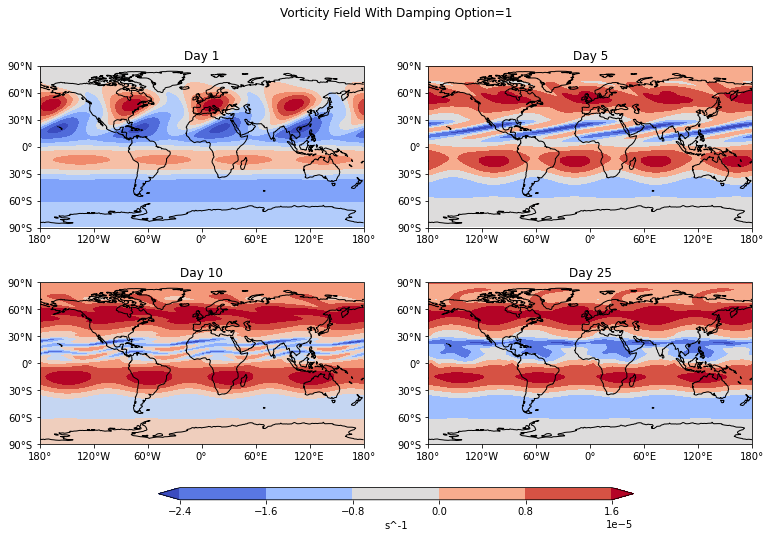

In [27]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the days and plot
for i,day in enumerate(vorticity_days):
        day_list = ['Day 1','Day 5','Day 10','Day 25']
        data= vorticity_days[i,:,:]
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=data_lon)

        # Contour plot
        cs=axs[i].contourf(lons,data_lat,data,transform = ccrs.PlateCarree(), cmap='coolwarm',extend='both')
       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(day_list[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='s^-1')

# Add a big title at the top
plt.suptitle('Vorticity Field With Damping Option=1')
plt.savefig('/homes/areed29/CLIM711/HW6figs/vor_dampopt1.png')

### Streamfunction field

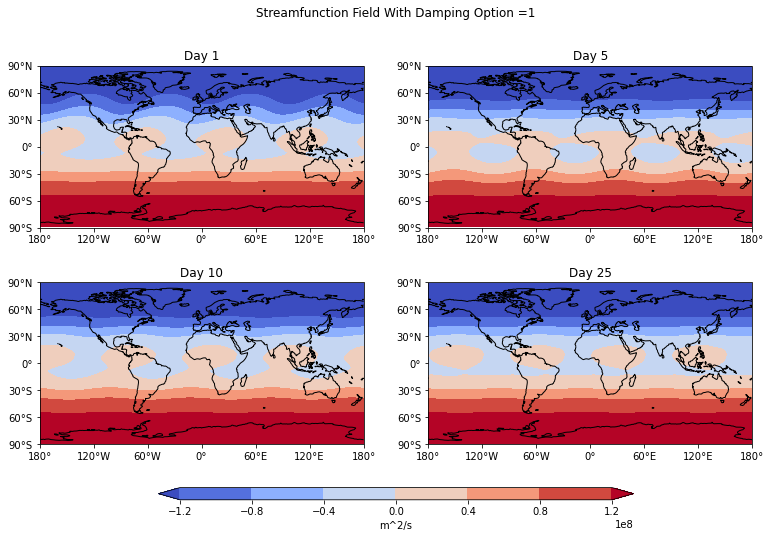

In [17]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the days and plot
for i,day in enumerate(stream_days):
        day_list = ['Day 1','Day 5','Day 10','Day 25']
        data= stream_days[i,:,:]
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=data_lon)

        # Contour plot
        cs=axs[i].contourf(lons,data_lat,data,transform = ccrs.PlateCarree(), cmap='coolwarm',extend='both')
       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(day_list[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m^2/s')

# Add a big title at the top
plt.suptitle('Streamfunction Field With Damping Option =1')
plt.savefig('/homes/areed29/CLIM711/HW6figs/stream_dampopt1.png')

b. Damping option of 2

In [28]:
# Load in the file and its contents
f= '/scratch/areed29/clim711/gfdl_spectral_code/experiments/t85barotropic/damp_option_2/barotropic.nc'
DS= xr.open_dataset(f,decode_times=False)
print(DS)

<xarray.Dataset>
Dimensions:   (lat: 128, latb: 129, lon: 256, lonb: 257, time: 25)
Coordinates:
  * lon       (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lonb      (lonb) float64 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat       (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * latb      (latb) float64 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
  * time      (time) float64 1.0 2.0 3.0 4.0 5.0 ... 21.0 22.0 23.0 24.0 25.0
Data variables:
    ucomp     (time, lat, lon) float32 ...
    vcomp     (time, lat, lon) float32 ...
    vor       (time, lat, lon) float32 ...
    pv        (time, lat, lon) float32 ...
    stream    (time, lat, lon) float32 ...
    trs       (time, lat, lon) float32 ...
    tr        (time, lat, lon) float32 ...
    eddy_vor  (time, lat, lon) float32 ...
    delta_u   (time, lat, lon) float32 ...
Attributes:
    filename:   barotropic.nc
    title:      t85barotropic
    grid_type:  regular
    grid_tile: 

In [29]:
#Extract necessary variables from the file
data_lat = DS.lat.values
data_lon = DS.lon.values
u_comp=DS.ucomp
v_comp=DS.vcomp
vor = DS.vor
pv= DS.pv.values
stream= DS.stream
trs = DS.trs
tr = DS.tr
eddy_vor = DS.eddy_vor
delta_u = DS.delta_u
#Select vorticity values for days 1, 5, 10, and 25
vorticity_days = vor.sel(time=(vor['time'][0],vor['time'][4],vor['time'][9],vor['time'][24]))
stream_days = stream.sel(time=(stream['time'][0],stream['time'][4],stream['time'][9],stream['time'][24]))

### Vorticity Field

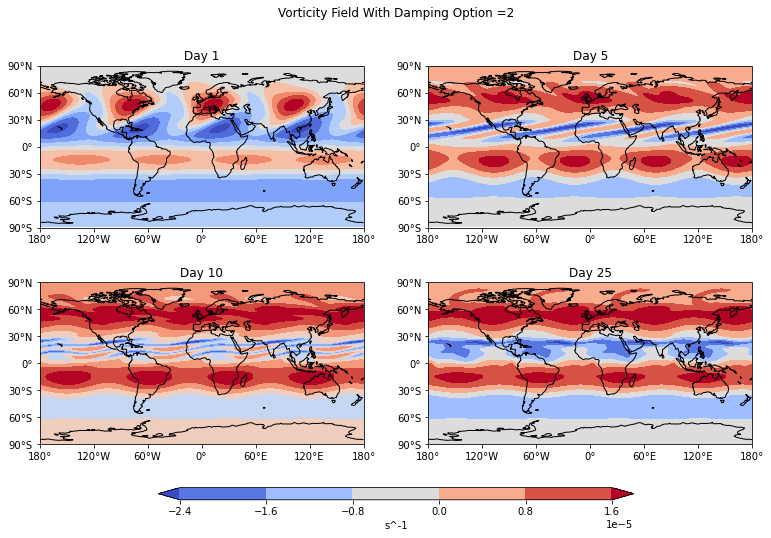

In [30]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the days and plot
for i,day in enumerate(vorticity_days):
        day_list = ['Day 1','Day 5','Day 10','Day 25']
        data= vorticity_days[i,:,:]
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=data_lon)

        # Contour plot
        cs=axs[i].contourf(lons,data_lat,data,transform = ccrs.PlateCarree(), cmap='coolwarm',extend='both')
       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(day_list[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='s^-1')

# Add a big title at the top
plt.suptitle('Vorticity Field With Damping Option =2')
plt.savefig('/homes/areed29/CLIM711/HW6figs/vor_dampopt2.png')

### Streamfunction Field

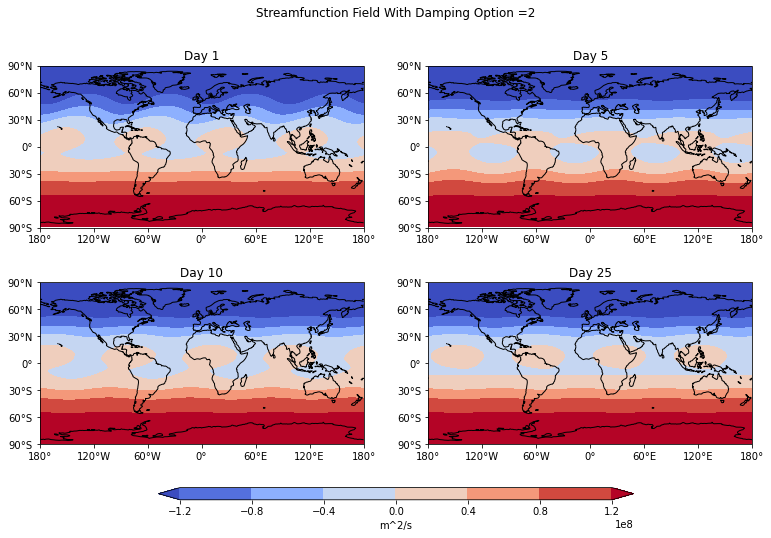

In [21]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the days and plot
for i,day in enumerate(stream_days):
        day_list = ['Day 1','Day 5','Day 10','Day 25']
        data= stream_days[i,:,:]
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=data_lon)

        # Contour plot
        cs=axs[i].contourf(lons,data_lat,data,transform = ccrs.PlateCarree(), cmap='coolwarm',extend='both')
       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(day_list[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m^2/s')

# Add a big title at the top
plt.suptitle('Streamfunction Field With Damping Option =2')
plt.savefig('/homes/areed29/CLIM711/HW6figs/stream_dampopt2.png')

c. Damping option of 3

In [22]:
# Load in the file and its contents
f= '/scratch/areed29/clim711/gfdl_spectral_code/experiments/t85barotropic/damp_option_3/barotropic.nc'
DS= xr.open_dataset(f,decode_times=False)
print(DS)

<xarray.Dataset>
Dimensions:   (lat: 128, latb: 129, lon: 256, lonb: 257, time: 25)
Coordinates:
  * lon       (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lonb      (lonb) float64 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat       (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * latb      (latb) float64 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
  * time      (time) float64 1.0 2.0 3.0 4.0 5.0 ... 21.0 22.0 23.0 24.0 25.0
Data variables:
    ucomp     (time, lat, lon) float32 ...
    vcomp     (time, lat, lon) float32 ...
    vor       (time, lat, lon) float32 ...
    pv        (time, lat, lon) float32 ...
    stream    (time, lat, lon) float32 ...
    trs       (time, lat, lon) float32 ...
    tr        (time, lat, lon) float32 ...
    eddy_vor  (time, lat, lon) float32 ...
    delta_u   (time, lat, lon) float32 ...
Attributes:
    filename:   barotropic.nc
    title:      t85barotropic
    grid_type:  regular
    grid_tile: 

In [23]:
#Extract necessary variables from the file
data_lat = DS.lat.values
data_lon = DS.lon.values
u_comp=DS.ucomp
v_comp=DS.vcomp
vor = DS.vor
pv= DS.pv.values
stream= DS.stream
trs = DS.trs
tr = DS.tr
eddy_vor = DS.eddy_vor
delta_u = DS.delta_u
#Select vorticity values for days 1, 5, 10, and 25
vorticity_days = vor.sel(time=(vor['time'][0],vor['time'][4],vor['time'][9],vor['time'][24]))
stream_days = stream.sel(time=(stream['time'][0],stream['time'][4],stream['time'][9],stream['time'][24]))

### Vorticity Field

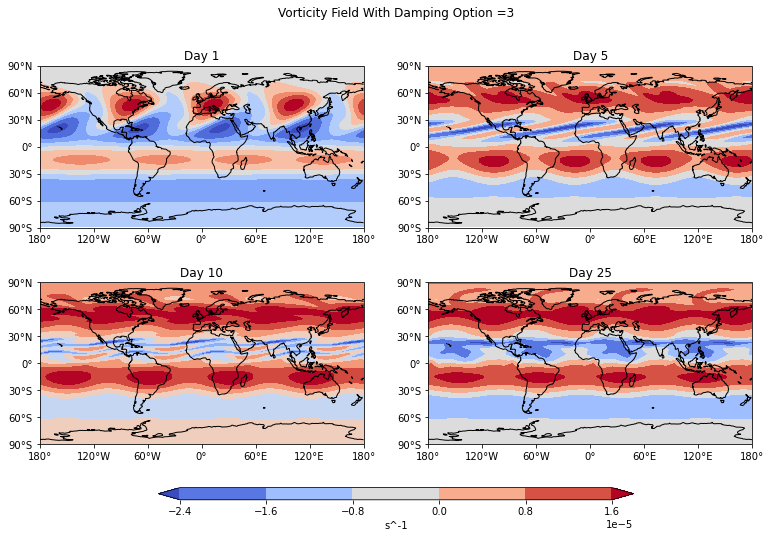

In [24]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the days and plot
for i,day in enumerate(vorticity_days):
        day_list = ['Day 1','Day 5','Day 10','Day 25']
        data= vorticity_days[i,:,:]
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=data_lon)

        # Contour plot
        cs=axs[i].contourf(lons,data_lat,data,transform = ccrs.PlateCarree(), cmap='coolwarm',extend='both')
       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(day_list[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='s^-1')

# Add a big title at the top
plt.suptitle('Vorticity Field With Damping Option =3')
plt.savefig('/homes/areed29/CLIM711/HW6figs/vor_dampopt3.png')

### Streamfunction Field

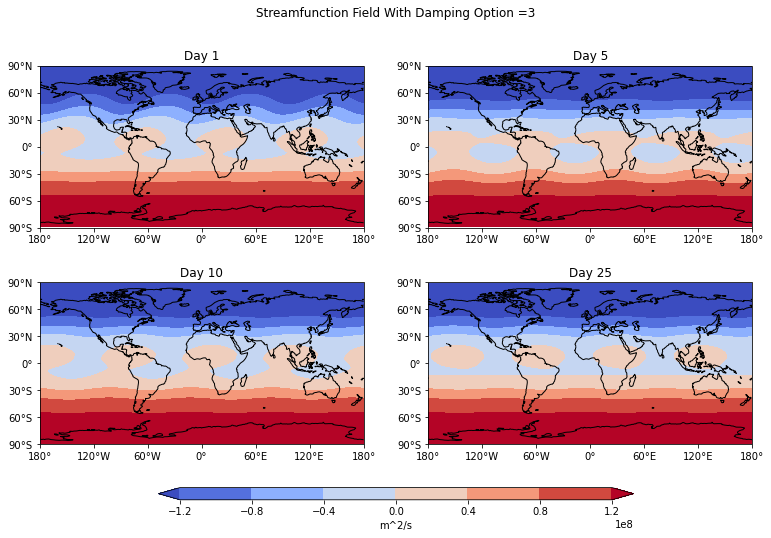

In [25]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the days and plot
for i,day in enumerate(stream_days):
        day_list = ['Day 1','Day 5','Day 10','Day 25']
        data= stream_days[i,:,:]
        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=data_lon)

        # Contour plot
        cs=axs[i].contourf(lons,data_lat,data,transform = ccrs.PlateCarree(), cmap='coolwarm',extend='both')
       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the season
        axs[i].set_title(day_list[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m^2/s')

# Add a big title at the top
plt.suptitle('Streamfunction Field With Damping Option =3')
plt.savefig('/homes/areed29/CLIM711/HW6figs/stream_dampopt3.png')